<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
#| eval: false
from fastcore.test import test_close
from torch import distributions

torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
torch.manual_seed(1)
mpl.rcParams['image.cmap'] = 'gray_r'

import logging
logging.disable(logging.WARNING)

set_seed(42)
if fc.defaults.cpus>8: fc.defaults.cpus=8

## Classifier

In [ ]:
#| eval: false
xl,yl = 'image','label'
name = "fashion_mnist"
bs = 512

@inplace
def transformi(b): b[xl] = [F.pad(TF.to_tensor(o), (2,2,2,2))*2-1 for o in b[xl]]

dsd = load_dataset(name)
tds = dsd.with_transform(transformi)
dls = DataLoaders.from_dd(tds, bs, num_workers=fc.defaults.cpus)

In [ ]:
#| eval: false
b = xb,yb = next(iter(dls.train))

In [ ]:
#| eval: false
cbs = [DeviceCB(), MixedPrecision()]
model = torch.load('models/data_aug2.pkl')
learn = Learner(model, dls, F.cross_entropy, cbs=cbs, opt_func=None)

In [1]:
#| echo: false
#| output: asis
show_doc(append_outp)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/fid.py#L38){target="_blank" style="float:right; font-size:smaller"}

### append_outp

>      append_outp (hook, mod, inp, outp)

In [ ]:
#| eval: false
hcb = HooksCallback(append_outp, mods=[learn.model[6]], on_valid=True)

In [ ]:
#| eval: false
learn.fit(1, train=False, cbs=[hcb])

In [ ]:
#| eval: false
feats = hcb.hooks[0].outp[0].float()[:64]
feats.shape

torch.Size([64, 512])

In [ ]:
#| eval: false
del(learn.model[8])
del(learn.model[7])

In [ ]:
#| eval: false
feats,y = learn.capture_preds()
feats = feats.float()
feats.shape,y

(torch.Size([10000, 512]), tensor([9, 2, 1,  ..., 8, 1, 5]))

## Calc FID

In [ ]:
#| eval: false
betamin,betamax,n_steps = 0.0001,0.02,1000
beta = torch.linspace(betamin, betamax, n_steps)
alpha = 1.-beta
alphabar = alpha.cumprod(dim=0)
sigma = beta.sqrt()

In [2]:
#| echo: false
#| output: asis
show_doc(dl_ddpm)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/fid.py#L53){target="_blank" style="float:right; font-size:smaller"}

### dl_ddpm

>      dl_ddpm (ds)

In [3]:
#| echo: false
#| output: asis
show_doc(collate_ddpm)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/fid.py#L52){target="_blank" style="float:right; font-size:smaller"}

### collate_ddpm

>      collate_ddpm (b)

In [4]:
#| echo: false
#| output: asis
show_doc(noisify)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/fid.py#L43){target="_blank" style="float:right; font-size:smaller"}

### noisify

>      noisify (x0, ᾱ)

In [ ]:
#| eval: false
dls2 = DataLoaders(dl_ddpm(tds['train']), dl_ddpm(tds['test']))

In [5]:
#| echo: false
#| output: asis
show_doc(UNet)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/fid.py#L58){target="_blank" style="float:right; font-size:smaller"}

### UNet

>      UNet (sample_size:Union[int,Tuple[int,int],NoneType]=None,
>            in_channels:int=3, out_channels:int=3,
>            center_input_sample:bool=False,
>            time_embedding_type:str='positional', freq_shift:int=0,
>            flip_sin_to_cos:bool=True,
>            down_block_types:Tuple[str]=('DownBlock2D', 'AttnDownBlock2D',
>            'AttnDownBlock2D', 'AttnDownBlock2D'),
>            up_block_types:Tuple[str]=('AttnUpBlock2D', 'AttnUpBlock2D',
>            'AttnUpBlock2D', 'UpBlock2D'), block_out_channels:Tuple[int]=(224,
>            448, 672, 896), layers_per_block:int=2,
>            mid_block_scale_factor:float=1, downsample_padding:int=1,
>            downsample_type:str='conv', upsample_type:str='conv',
>            dropout:float=0.0, act_fn:str='silu',
>            attention_head_dim:Optional[int]=8, norm_num_groups:int=32,
>            attn_norm_num_groups:Optional[int]=None, norm_eps:float=1e-05,
>            resnet_time_scale_shift:str='default', add_attention:bool=True,
>            class_embed_type:Optional[str]=None,
>            num_class_embeds:Optional[int]=None,
>            num_train_timesteps:Optional[int]=None)

A 2D UNet model that takes a noisy sample and a timestep and returns a sample shaped output.

This model inherits from [`ModelMixin`]. Check the superclass documentation for it's generic methods implemented
for all models (such as downloading or saving).

Parameters:
    sample_size (`int` or `Tuple[int, int]`, *optional*, defaults to `None`):
        Height and width of input/output sample. Dimensions must be a multiple of `2 ** (len(block_out_channels) -
        1)`.
    in_channels (`int`, *optional*, defaults to 3): Number of channels in the input sample.
    out_channels (`int`, *optional*, defaults to 3): Number of channels in the output.
    center_input_sample (`bool`, *optional*, defaults to `False`): Whether to center the input sample.
    time_embedding_type (`str`, *optional*, defaults to `"positional"`): Type of time embedding to use.
    freq_shift (`int`, *optional*, defaults to 0): Frequency shift for Fourier time embedding.
    flip_sin_to_cos (`bool`, *optional*, defaults to `True`):
        Whether to flip sin to cos for Fourier time embedding.
    down_block_types (`Tuple[str]`, *optional*, defaults to `("DownBlock2D", "AttnDownBlock2D", "AttnDownBlock2D", "AttnDownBlock2D")`):
        Tuple of downsample block types.
    mid_block_type (`str`, *optional*, defaults to `"UNetMidBlock2D"`):
        Block type for middle of UNet, it can be either `UNetMidBlock2D` or `UnCLIPUNetMidBlock2D`.
    up_block_types (`Tuple[str]`, *optional*, defaults to `("AttnUpBlock2D", "AttnUpBlock2D", "AttnUpBlock2D", "UpBlock2D")`):
        Tuple of upsample block types.
    block_out_channels (`Tuple[int]`, *optional*, defaults to `(224, 448, 672, 896)`):
        Tuple of block output channels.
    layers_per_block (`int`, *optional*, defaults to `2`): The number of layers per block.
    mid_block_scale_factor (`float`, *optional*, defaults to `1`): The scale factor for the mid block.
    downsample_padding (`int`, *optional*, defaults to `1`): The padding for the downsample convolution.
    downsample_type (`str`, *optional*, defaults to [`conv`](https://bthek1.github.io/fastAIcourse/initializing.html#conv)):
        The downsample type for downsampling layers. Choose between "conv" and "resnet"
    upsample_type (`str`, *optional*, defaults to [`conv`](https://bthek1.github.io/fastAIcourse/initializing.html#conv)):
        The upsample type for upsampling layers. Choose between "conv" and "resnet"
    dropout (`float`, *optional*, defaults to 0.0): The dropout probability to use.
    act_fn (`str`, *optional*, defaults to `"silu"`): The activation function to use.
    attention_head_dim (`int`, *optional*, defaults to `8`): The attention head dimension.
    norm_num_groups (`int`, *optional*, defaults to `32`): The number of groups for normalization.
    attn_norm_num_groups (`int`, *optional*, defaults to `None`):
        If set to an integer, a group norm layer will be created in the mid block's [`Attention`] layer with the
        given number of groups. If left as `None`, the group norm layer will only be created if
        `resnet_time_scale_shift` is set to `default`, and if created will have `norm_num_groups` groups.
    norm_eps (`float`, *optional*, defaults to `1e-5`): The epsilon for normalization.
    resnet_time_scale_shift (`str`, *optional*, defaults to `"default"`): Time scale shift config
        for ResNet blocks (see [`~models.resnet.ResnetBlock2D`]). Choose from `default` or `scale_shift`.
    class_embed_type (`str`, *optional*, defaults to `None`):
        The type of class embedding to use which is ultimately summed with the time embeddings. Choose from `None`,
        `"timestep"`, or `"identity"`.
    num_class_embeds (`int`, *optional*, defaults to `None`):
        Input dimension of the learnable embedding matrix to be projected to `time_embed_dim` when performing class
        conditioning with `class_embed_type` equal to `None`.

In [ ]:
#| eval: false
smodel = torch.load('models/fashion_ddpm_mp.pkl').cuda()

In [6]:
#| echo: false
#| output: asis
show_doc(sample)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/fid.py#L63){target="_blank" style="float:right; font-size:smaller"}

### sample

>      sample (model, sz, alpha, alphabar, sigma, n_steps)

In [ ]:
#| eval: false
samples = sample(smodel, (256, 1, 32, 32), alpha, alphabar, sigma, n_steps)

CPU times: user 1min 47s, sys: 7.21 s, total: 1min 54s
Wall time: 1min 53s


In [ ]:
#| eval: false
s = samples[-1]*2-1

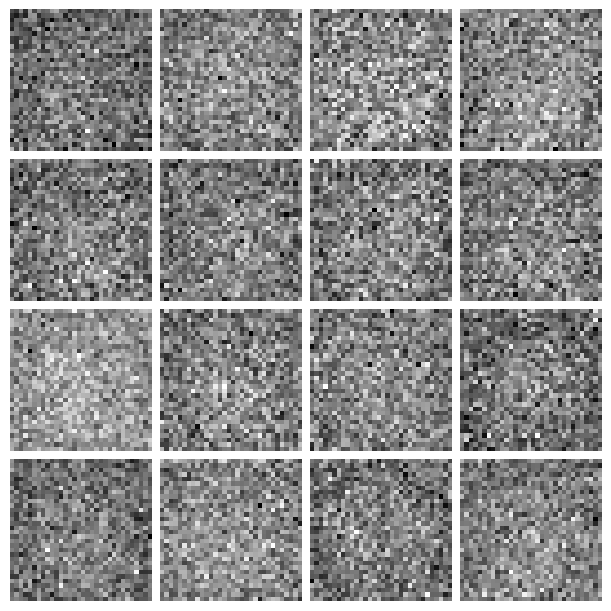

In [ ]:
#| eval: false
show_images(s[:16], imsize=1.5)

In [ ]:
#| eval: false
clearn = TrainLearner(model, DataLoaders([],[(s,yb)]), loss_func=fc.noop, cbs=[DeviceCB()], opt_func=None)
feats2,y2 = clearn.capture_preds()
feats2 = feats2.float().squeeze()
feats2.shape

torch.Size([256, 512])

In [ ]:
#| eval: false
means = feats.mean(0)
means.shape

torch.Size([512])

In [ ]:
#| eval: false
covs = feats.T.cov()
covs.shape

torch.Size([512, 512])

In [ ]:
#| eval: false
s1,s2 = _calc_stats(feats),_calc_stats(feats2)

In [ ]:
#| eval: false
_calc_fid(*s1, *s2)

33.83489121216962

In [ ]:
#| eval: false
_calc_kid(feats, feats2)

0.05612194538116455

## FID class

In [7]:
#| echo: false
#| output: asis
show_doc(ImageEval)

---

[source](https://github.com/bthek1/fastAIcourse/blob/main/fastAIcourse/fid.py#L126){target="_blank" style="float:right; font-size:smaller"}

### ImageEval

>      ImageEval (model, dls, cbs=None)

Initialize self.  See help(type(self)) for accurate signature.

In [ ]:
#| eval: false
ie = ImageEval(model, learn.dls, cbs=[DeviceCB()])

In [ ]:
#| eval: false

ie.fid(s)

CPU times: user 7.38 s, sys: 234 ms, total: 7.62 s
Wall time: 263 ms


33.90600362686632

In [ ]:
#| eval: false

ie.kid(s)

CPU times: user 714 ms, sys: 23 ms, total: 737 ms
Wall time: 23 ms


0.0564301423728466

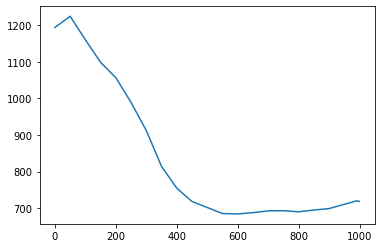

In [ ]:
#| eval: false
xs = L.range(0,1000,50)+[975,990,999]
plt.plot(xs, [ie.fid(samples[i].clamp(-0.5,0.5)*2) for i in xs]);

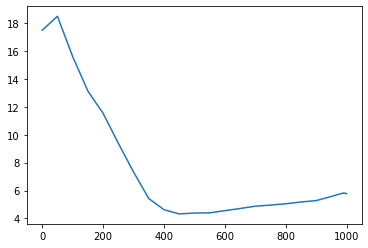

In [ ]:
#| eval: false
xs = L.range(0,1000,50)+[975,990,999]
plt.plot(xs, [ie.kid(samples[i].clamp(-0.5,0.5)*2) for i in xs]);

In [ ]:
#| eval: false
ie.fid(xb)

6.615052956342197

In [ ]:
#| eval: false
ie.kid(xb)

-0.02641688659787178

## Inception

In [ ]:
#| eval: false
from pytorch_fid.inception import InceptionV3

In [ ]:
#| eval: false
a = tensor([1,2,3])
a.repeat((3,1))

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [ ]:
#| eval: false
class IncepWrap(nn.Module):
    def __init__(self):
        super().__init__()
        self.m = InceptionV3(resize_input=True)
    def forward(self, x): return self.m(x.repeat(1,3,1,1))[0]

In [ ]:
#| eval: false
tds = dsd.with_transform(transformi)
dls = DataLoaders.from_dd(tds, bs, num_workers=fc.defaults.cpus)

In [ ]:
#| eval: false
ie = ImageEval(IncepWrap(), dls, cbs=[DeviceCB()])

In [ ]:
#| eval: false

ie.fid(s)

CPU times: user 1min 11s, sys: 1.61 s, total: 1min 13s
Wall time: 2.31 s


63.81579821823857

In [ ]:
#| eval: false
ie.fid(xb)

27.95811916882883

In [ ]:
#| eval: false

ie.kid(s)

CPU times: user 7.44 s, sys: 140 ms, total: 7.58 s
Wall time: 255 ms


0.010766863822937012

In [ ]:
#| eval: false
ie.kid(xb)

-8.697943121660501e-05